## Imports and data prep

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('data-week-3.csv')
 
df.columns = df.columns.str.lower().str.replace(' ', '_')
 
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
 
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')
 
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)
 
df.churn = (df.churn == 'yes').astype(int)
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,0
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1


## Split the data and train the model

In [3]:
# Next, we use the ‘train_test_split’ function to split the datasets into ‘full_train’ (80%) and ‘test’ in the first step. 
# In the second step, ‘full_train’ is further divided into two datasets for training and validation. 
# Ultimately, we achieve a split of the initial data into a 60%-20%-20% ratio, where 60% is used for training, 
# and 20% each is allocated for validation and testing. 
# The parameter ‘random_state=1’ ensures that the random split is reproducible.

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
 
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
 
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values
 
del df_train['churn']
del df_val['churn']
del df_test['churn'] 

df_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,yes,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15
1,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,yes,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55
2,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65
3,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,no,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10
4,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50


In [4]:
# Define two features lists, ‘numerical’ and ‘categorical’, which contain the relevant column names. 
# The ‘numerical’ array contains the names of all numerical columns, while the ‘categorical’ 
# array contains the names of all categorical columns.

numerical = ['tenure', 'monthlycharges', 'totalcharges']
 
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [5]:
# Next, we create a DictVectorizer instance. We then transform the dataframe into dictionaries, 
# and using the ‘fit_transform(train_dict)’ function, we train the DictVectorizer. This step involves 
# showing the DictVectorizer how the data is structured, allowing it to distinguish column names and 
# values and perform one-hot encoding based on this information. Importantly, the DictVectorizer is 
# smart enough to distinguish between categorical values and numeric values, so numeric values are 
# ignored during one-hot encoding. The ‘transform’ part of this process converts the dictionary 
# into a vector or matrix suitable for machine learning.

# After preparing the data, we move on to model creation. In this case, a Logistic Regression model is used. 
# The ‘model.fit’ function is then employed to train the model on the training data.

dv = DictVectorizer(sparse=False)
 
train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
 
model = LogisticRegression()
model.fit(X_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [6]:
# We can then proceed to validate the trained model using the validation data. 
# To do this, we need to prepare the validation DataFrame in the same way as shown 
# for the training DataFrame. This involves transforming it into dictionaries and 
# applying the ‘transform’ function of the DictVectorizer. However, during validation, 
# we only need to use the ‘transform’ function of the DictVectorizer since it already 
# knows the data structure. In the case of validation, we are primarily interested 
# in the transformed output, which serves as input for prediction.

# For prediction, we use the ‘predict_proba’ function of the model, which provides 
# us with probabilities in two columns. Here, we are interested in the second 
# column. We evaluate the model’s performance using a threshold of ‘>=0.5’. 
# The ‘churn_decision’ variable contains ‘True’ for any value in the prediction 
# greater than or equal to the threshold, and ‘False’ otherwise. We calculate the 
# accuracy using the ‘mean’ function, and in this case, it is approximately 80%.

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)
 
y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()
 
# Output: 0.8034066713981547

np.float64(0.8034066713981547)

In [7]:
# calc another way to double-check myself:
churn_decision2 = model.predict(X_val)
(y_val == churn_decision2).mean()
# same output 0.8034066713981547

np.float64(0.8034066713981547)

## Accuracy and dummy model

In [8]:
# Out of the 1409 customers in the validation dataset, we made 1132 correct predictions. Therefore, 
# the accuracy is calculated as 1132/1409 = 0.80, which corresponds to 80%. This accuracy 
# indicates that our model correctly predicted the churn status for 80% of the customers in the 
# validation dataset. Whether this is considered good or not 
# depends on the specific context and requirements of the problem.

len(y_val)
# Output: 1409
 
(y_val == churn_decision).sum()
# Output: 1132
 
1132 / 1409
# Output: 0.8034
 
# accuracy = (y_val == churn_decision).mean()
# Output: 0.8034

0.8034066713981547

In [9]:
# RE our churn decision - it may or may not be correct:
# churn_decision = (y_pred >= 0.5) # 0.5 was selected by gur feel, lets test it properly...

# TLDR:
# The question now is whether we have chosen a good value for the threshold. To evaluate 
# this, we can adjust the threshold and perform validation again. By systematically 
# varying the threshold, we can observe whether it improves the accuracy or not. To do this, 
# we can use the ‘linspace’ function from NumPy to generate an array with multiple threshold 
# values (e.g., 21 values evenly spaced between 0 and 1). For each threshold value, we can 
# calculate the accuracy and then determine the best threshold value based on the validation 
# results. This process allows us to fine-tune the threshold to optimize the model’s performance.

thresholds = np.linspace(0, 1, 21)
thresholds
 
# Output:        
# array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
#        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [10]:
scores = []
 
for t in thresholds:
    churn_decision = (y_pred >= t)
    score = (y_val == churn_decision).mean()
    print('%.2f %.3f' % (t, score))
    scores.append(score)

# actually our initial choice was right and with 0.5 we get best accuracy - 0.50 0.803 - see below
# thats why in model.predict - << churn_decision2 = model.predict(X_val) >> - threshold 0.5 is baked in by SKL automatically...

0.00 0.274
0.05 0.509
0.10 0.591
0.15 0.667
0.20 0.710
0.25 0.737
0.30 0.760
0.35 0.772
0.40 0.785
0.45 0.793
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.765
0.75 0.744
0.80 0.735
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


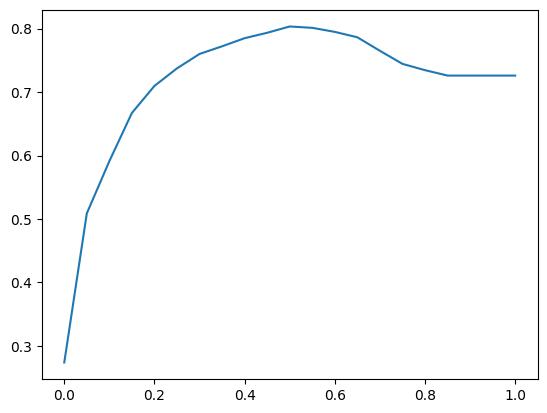

In [11]:
# TLDR 
# It appears that 0.5 is indeed the best threshold based on the validation set. This 
# suggests that the default threshold of 0.5 is an appropriate choice for our model in this 
# context. To visually represent this threshold optimization process, we can create a plot. 
# The x-axis will represent the threshold values, while the y-axis will represent the corresponding 
# scores (in this case, accuracy or another relevant metric). This plot will provide a clear visualization 
# of how the model’s performance varies with different threshold values, helping us identify the threshold 
# that maximizes the desired metric.

plt.plot(thresholds,scores) # 0.5 is our curve max

In [12]:
# we don't have to do it manually all the time - SKL has built-in function
from sklearn.metrics import accuracy_score

In [13]:
accuracy_score(y_val, y_pred>=0.5)
# same 0.8034066713981547 as before

0.8034066713981547

In [14]:
# and we can modify our function as 

scores = []
 
for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

# same as before 0.50 0.803

0.00 0.274
0.05 0.509
0.10 0.591
0.15 0.667
0.20 0.710
0.25 0.737
0.30 0.760
0.35 0.772
0.40 0.785
0.45 0.793
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.765
0.75 0.744
0.80 0.735
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


In [15]:
# Check Accuracy of Dummy Baseline
# dummy model predicts with 73% accuracy - if we say no one would churn and no need to send promo emails:
accuracy_score(y_val, y_pred>= 1.0)
# 0.7260468417317246 = 73% - this is the baseline prediction
# We improved by 7% over the baseline so far...

0.7260468417317246

In [16]:
# it happens because our distribution is skewd - 3:1 class imbalance:
from collections import Counter

Counter(y_val) # counts our instances like so:
# Counter({np.int64(0): 1023, np.int64(1): 386})
# we have 1023 non-churn and only 386 churn customer cases - 3:1 ratio

Counter({np.int64(0): 1023, np.int64(1): 386})

In [17]:
y_val.mean()
# np.float64(0.2739531582682754) - only 27% customers churn

np.float64(0.2739531582682754)

In [18]:
1-y_val.mean()
# np.float64(0.7260468417317246) - 73% non-churning customers - 
# this is exactly the 73% our dummy model predicted...
# so if we predict no one will churn - by dummy model or by bad quality model 
# due to the class imbalance 3:1 we will be right in 73% - our baseline. 

# I remember Casie Kozyrkov Google ML eng lecture and her parking lot example 
# where the model predicted parking always 100% occupied.


np.float64(0.7260468417317246)

## Confusion table / confusion matrix

In [19]:
# we have to use other metrics than accuracy in our class imbalanced case,
# because accuracy alone gives us only 7% over the baseline - not enough.
actual_positive = (y_val == 1) # people who in fact churned
# actual_positive # array([False, False, False, ..., False,  True,  True], shape=(1409,))
actual_negative = (y_val == 0) # people who in fact did NOT churn


In [20]:
t = 0.5 # our threshold
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [21]:
# then true positive are in fact people who did churn and were predicted to churn:
true_positive = actual_positive & predict_positive 
# & - logical AND - here select people who were positive in both cases

In [22]:
# how many of them?
tp = (actual_positive & predict_positive).sum()
tp # 210

np.int64(210)

In [23]:
# similar with true negatives - predicted not churn and not churned in real life
tn = (actual_negative & predict_negative).sum()
tn # 922

np.int64(922)

In [24]:
# false positive - people who were predicted to churn but never did:
fp = (actual_negative & predict_positive).sum()
fp # 101

np.int64(101)

In [25]:
# and false negative - people who were predicted to stay but in fact churned:
fn = (actual_positive & predict_negative).sum()
fn # 176

np.int64(176)

In [26]:
# quick sanity check -
fp + fn + tp + tn
# 1409 - this is how many people we have in val dataset - all good!

np.int64(1409)

In [27]:
# Lets create confusion matrix as Numpy array
confusion_matrix = np.array([
[tn, fp],
[fn, tp]
])

In [28]:
# lets print it out
confusion_matrix
# array([[922, 101],
#        [176, 210]])

array([[922, 101],
       [176, 210]])

In [29]:
# and get % values
(confusion_matrix / confusion_matrix.sum()).round(2)
# array([[0.65, 0.07],
#        [0.12, 0.15]])

# we ended up in 80% correct predictions - tp + tn = our accuracy 80%
# and 20% incorrect predictions - fp + fn

array([[0.65, 0.07],
       [0.12, 0.15]])

## Precision and recall

In [30]:
# from tp, tn, fp and fn we can derive other metrics too, not only confusion matrix and accuracy

# accuracy - how many correct predictions our model make
accuracy = (tp + tn)/(tp+tn+fp+fn)
accuracy # np.float64(0.8034066713981547) - our 80% accuracy

np.float64(0.8034066713981547)

In [31]:
# precision is fraction of positive predictions (churn) that are correct

p = tp / (tp + fp)  # true positives divided by all positives - 
# - how much churn we actually collect/address with our model - 
# - we were able to collect 2/3 churn customer cases
p # np.float64(0.6752411575562701) - 67%

np.float64(0.6752411575562701)

In [32]:
# recall - how many people our model recognised as churn out of all churning people

r = tp / (tp + fn)
r # np.float64(0.5440414507772021) - 54% - roughly 1/2

np.float64(0.5440414507772021)

## ROC curves

In [33]:
# ROC - receiver operating characteristics
# Comes from WWII - evaluating of the strength of radar detectors 
# We are interested in FPR - false positive rate and TPR - true positive rate

# FPR = fp / (fp + tn) # divide false positives by all negatives - true neg and false pos
# TPR = tp / (fn + tp) # divide true positives by all positives - false neg and true pos

tpr = tp / (fn + tp)
fpr = fp / (fp + tn)
(fpr, tpr) # (np.float64(0.09872922776148582), np.float64(0.5440414507772021))
# 10% and 54% respectively 

(np.float64(0.09872922776148582), np.float64(0.5440414507772021))

In [34]:
tpr, r # tpr is the same as recall - percentage of how much our model collects/predicts churn from all churn - about 1/2

(np.float64(0.5440414507772021), np.float64(0.5440414507772021))

In [35]:
# we can evaluate tpr and fpr for different thresholds - not only for 0.5 - similar to radar sensitivity fine tuning

scores = []
thresholds = np.linspace(0, 1, 101) # similar to list(range(...

for t in thresholds:
    actual_positive = (y_val == 1) # people who in fact churned
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (actual_positive & predict_positive).sum()
    tn = (actual_negative & predict_negative).sum()
    fp = (actual_negative & predict_positive).sum()
    fn = (actual_positive & predict_negative).sum()

    scores.append((t, tp, fp, fn, tn))

scores[:3]

[(np.float64(0.0), np.int64(386), np.int64(1023), np.int64(0), np.int64(0)),
 (np.float64(0.01), np.int64(385), np.int64(911), np.int64(1), np.int64(112)),
 (np.float64(0.02), np.int64(384), np.int64(829), np.int64(2), np.int64(194))]

In [36]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)
# df_scores.columns = columns
df_scores.head()

,threshold,tp,fp,fn,tn
0,0.00,386,1023,0,0
1,0.01,385,911,1,112
2,0.02,384,829,2,194
3,0.03,383,766,3,257
4,0.04,381,715,5,308


In [37]:
# or nice trick - print every 10th record:
df_scores[::10]
# NB 50	0.5	210	101	176	922 - same as we saw before - quick sanity check

,threshold,tp,fp,fn,tn
0,0.0,386,1023,0,0
10,0.1,366,556,20,467
20,0.2,333,356,53,667
30,0.3,284,236,102,787
40,0.4,249,166,137,857
50,0.5,210,101,176,922
60,0.6,150,53,236,970
70,0.7,75,20,311,1003
80,0.8,13,1,373,1022
90,0.9,0,0,386,1023


In [38]:
# add tpr and fpr columns:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
df_scores[::10]
# quick sanity check - 50	0.5	210	101	176	922	0.544041	0.098729 - as we have seen before

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,366,556,20,467,0.948187,0.543500
20,0.2,333,356,53,667,0.862694,0.347996
30,0.3,284,236,102,787,0.735751,0.230694
40,0.4,249,166,137,857,0.645078,0.162268
50,0.5,210,101,176,922,0.544041,0.098729
60,0.6,150,53,236,970,0.388601,0.051808
70,0.7,75,20,311,1003,0.194301,0.019550
80,0.8,13,1,373,1022,0.033679,0.000978
90,0.9,0,0,386,1023,0.000000,0.000000


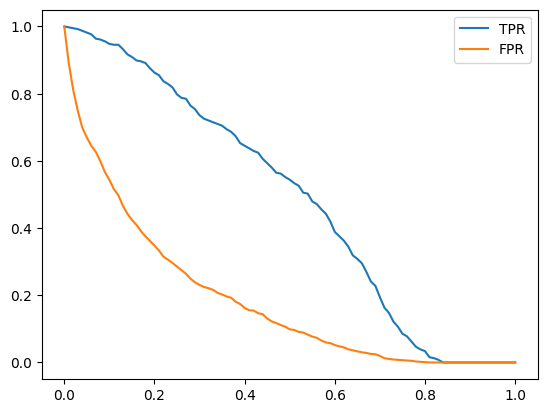

In [39]:
# and plotting part:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

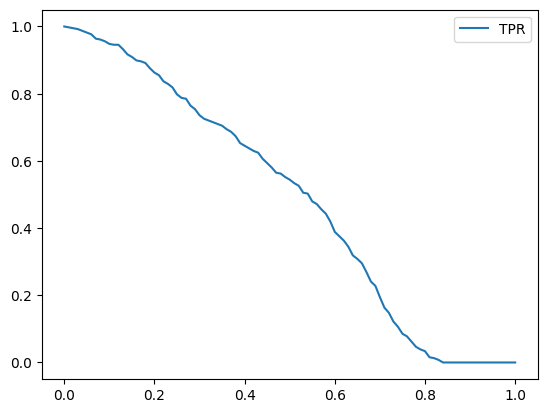

In [40]:
plt.plot(df_scores.threshold, df_scores.tpr, label='TPR')
plt.legend()

# for trhreshold = 0 our model is dummy mmodel - it predicts everyone as churn, thats why TPR = 1
# thus for model quality we need to minimize area under yellow curve => push the curve or FPR down
# and maximize area under blue curve -> to push TPR and its curve up respectively

## Random model

In [41]:
# Random model
# we need random model - model which randomly assign customers to churn/no churn groups
# so we can compare our model with the random choice and see if it is any better....

np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))
y_rand.round(3)

array([0.417, 0.72 , 0.   , ..., 0.774, 0.334, 0.089], shape=(1409,))

In [42]:
# we expect accuracy of this random model to be 50% - equal chance for hit or miss:
((y_rand >= 0.5) == y_val).mean() # np.float64(0.5017743080198722)

np.float64(0.5017743080198722)

In [43]:
# to plot tpr and fpr of this random model we put calculations into a function for convenience

	
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []
    thresholds = np.linspace(0, 1, 101)
 
    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
 
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)
 
        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()
 
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()
 
        scores.append((t, tp, tn, fp, fn))
 
    columns = ['threshold', 'tp', 'tn', 'fp', 'fn']
    df_scores = pd.DataFrame(scores, columns=columns)
 
    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
 
    return df_scores

    

In [44]:
# use our function to calc dataframe with random model metrics
df_rand = tpr_fpr_dataframe(y_val, y_rand)
df_rand[::10]
# quick sanity check - 50	0.5	202	505	518	184	0.523316	0.506354 - 50%/50% hit or miss chance

,threshold,tp,tn,fp,fn,tpr,fpr
0,0.0,386,0,1023,0,1.000000,1.000000
10,0.1,347,100,923,39,0.898964,0.902248
20,0.2,307,201,822,79,0.795337,0.803519
30,0.3,276,299,724,110,0.715026,0.707722
40,0.4,237,399,624,149,0.613990,0.609971
50,0.5,202,505,518,184,0.523316,0.506354
60,0.6,161,614,409,225,0.417098,0.399804
70,0.7,121,721,302,265,0.313472,0.295210
80,0.8,78,817,206,308,0.202073,0.201369
90,0.9,40,922,101,346,0.103627,0.098729


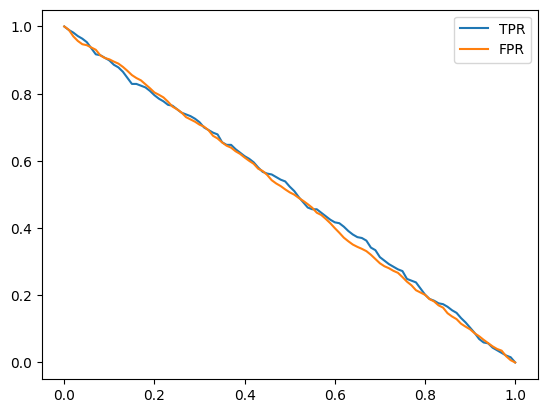

In [45]:
# and plot it in similar fashion as before
plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')
plt.legend()

## Ideal model

In [47]:
# Ideal model
# Now, let’s discuss the concept of an ideal model that makes correct predictions 
# for every example. To implement this, we need to determine the number of negative 
# examples, which corresponds to the number of people who are not churning in our dataset.

num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos, num_neg + num_pos

(np.int64(1023), np.int64(386), np.int64(1409))

In [48]:
# To create the ideal model’s predictions for our validation set, we first create a y_ideal 
# array that contains only negative observations (0s) followed by positive observations (1s). 
# We use the np.repeat() function to achieve this, creating an array with 1023 zeros and then 386 ones.

y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal
 
# Output: array([0, 0, 0, ..., 1, 1, 1])

array([0, 0, 0, ..., 1, 1, 1], shape=(1409,))

In [49]:
# To create our predictions for the ideal model, which are numbers between 0 and 1, we can use 
# the np.linspace() function to generate an array of evenly spaced values between 0 and 1. 
# This array should have the same length as y_ideal, which is 1409 in this case.

y_ideal_pred = np.linspace(0, 1, len(y_ideal))
y_ideal_pred
 
# Output: 
# array([0.00000000e+00, 7.10227273e-04, 1.42045455e-03, ...,
#       9.98579545e-01, 9.99289773e-01, 1.00000000e+00])

array([0.00000000e+00, 7.10227273e-04, 1.42045455e-03, ...,
       9.98579545e-01, 9.99289773e-01, 1.00000000e+00], shape=(1409,))

In [50]:
1 - y_val.mean()
# Output: 0.7260468417317246

np.float64(0.7260468417317246)

In [51]:
accuracy_ideal = ((y_ideal_pred >= 0.726) == y_ideal).mean()
accuracy_ideal # of course 100%)))  = np.float64(1.0)

np.float64(1.0)

In [52]:
# The ideal model, which makes perfect predictions, doesn’t exist in reality, but it 
# serves as a benchmark to understand how well our actual model is performing. 
# By comparing our model’s performance to that of the ideal model, we can assess 
# how much room for improvement there is.

df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)
df_ideal[::10]

,threshold,tp,tn,fp,fn,tpr,fpr
0,0.0,386,0,1023,0,1.000000,1.000000
10,0.1,386,141,882,0,1.000000,0.862170
20,0.2,386,282,741,0,1.000000,0.724340
30,0.3,386,423,600,0,1.000000,0.586510
40,0.4,386,564,459,0,1.000000,0.448680
50,0.5,386,704,319,0,1.000000,0.311828
60,0.6,386,845,178,0,1.000000,0.173998
70,0.7,386,986,37,0,1.000000,0.036168
80,0.8,282,1023,0,104,0.730570,0.000000
90,0.9,141,1023,0,245,0.365285,0.000000


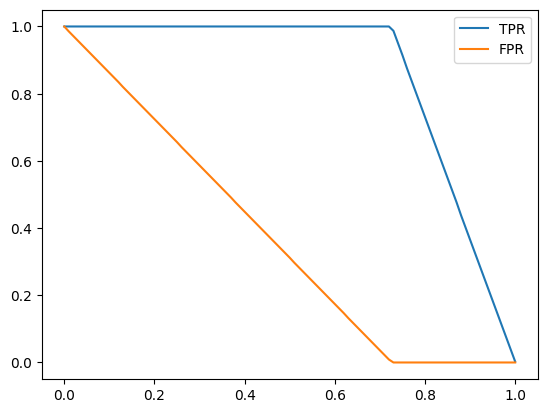

In [53]:
plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR')
plt.legend()

In [54]:
# What we see here is that TPR almost always stays around 1 and starts to go down after the 
# threshold of 0.726. So, this model can correctly identify churning customers up to that threshold. 
# For people who are not churning but are classified as churning by the model when the threshold is 
# below 0.726, the model is not always correct. However, the detection becomes always true after the threshold of 0.726.



## Putting everything together

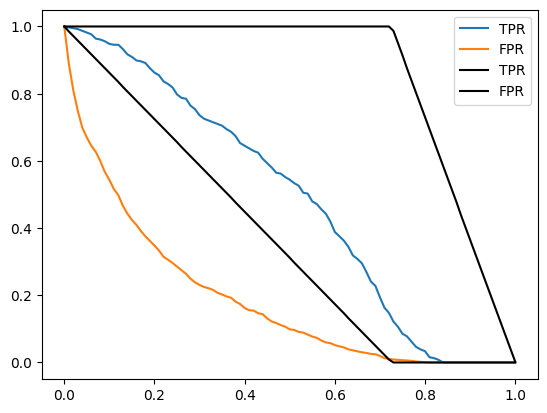

In [56]:
# Putting everything together
# Now let’s try to plot all the models together so we can hold the benchmarks together.

plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
 
#plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
#plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')
 
plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR', color = 'black')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR', color = 'black')
 
plt.legend()

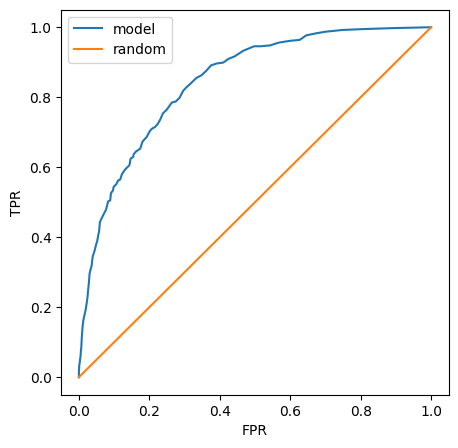

In [57]:
# We see that our TPR is far from the ideal model. We want it to be as close as possible to 1. 
# We also notice that our FPR is significantly different from that of the ideal model. 
# Plotting against the threshold is not always intuitive. For example, in our model, 
# the best threshold is 0.5, as we know from accuracy. However, for the ideal model, 
# as we saw earlier, the best threshold is 0.726. So they have different thresholds. 
# What we can do to better visualize this is to plot FPR against TPR. On the x-axis, 
# we’ll have FPR, and on the y-axis, we’ll have TPR. To make it easier to understand, 
# we can also add the benchmark lines.

plt.figure(figsize=(5,5))
 
plt.plot(df_scores.fpr, df_scores.tpr, label='model')
plt.plot([0,1], [0,1], label='random')
#plt.plot(df_rand.fpr, df_rand.tpr, label='random')
#plt.plot(df_ideal.fpr, df_ideal.tpr, label='ideal')
 
plt.xlabel('FPR')
plt.ylabel('TPR')
 
plt.legend()

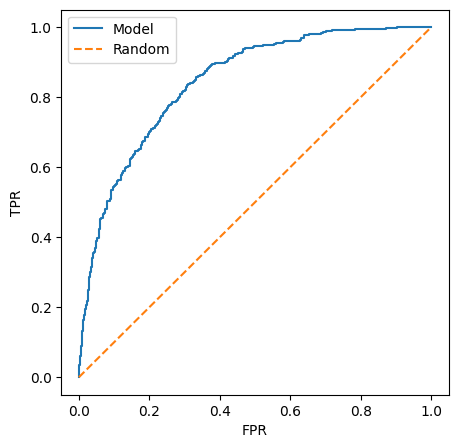

In [58]:
# In the curve of the ideal model, there is one crucial point, often referred to as the ‘north star’ 
# or ideal spot, located in the upper-left corner where TPR is 100% and FPR is 0%. This point represents 
# the optimal performance we aim to achieve with our model. A ROC curve visualizes this by plotting TPR 
# against FPR, and we usually add a diagonal random baseline. Our goal is to make our model’s curve as 
# close as possible to this ideal spot, which means simultaneously being as far away as possible from 
# the random baseline. In essence, if our model closely resembles the random baseline model, it is not performing well.

# We can also use the ROC functionality of scikit learn package
from sklearn.metrics import roc_curve
 
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
 
plt.figure(figsize=(5,5))
 
plt.plot(fpr, tpr, label='Model')
plt.plot([0,1], [0,1], label='Random', linestyle='--')
 
plt.xlabel('FPR')
plt.ylabel('TPR')
 
plt.legend()

In [59]:
# HERE WE NEED TO DECREASE THE AREA UNDER ROC CURVE - ROC AUC METRIC/PARAMETER - from my GCP ML eng exam....

# What kind of information do we get from ROC curve?
# Let’s begin in the lower-left corner, where both TPR and FPR are 0. This occurs at higher thresholds like 1.0. 
# In this scenario, we predict that every customer is non-churning, resulting in TPR being 0 since we don’t 
# predict anyone as churning. FPR is also 0 because there are no false positives; we only have true negatives (TN).

# As we move from the lower left corner, where the threshold starts at 1.0, we eventually reach the upper-right corner 
# with a threshold of 0.0. Here, our model achieves 100% TPR because we predict everyone as churning, enabling us to 
# identify all churning customers. However, we also make many mistakes, incorrectly identifying non-churning customers. 
# Thus, we have TPR = FPR = 100%.

# When we adjust the threshold, we predict more customers as churning, causing our TPR to increase, but the FPR also increases concurrently.

# The ROC curve allows us to observe how the model behaves at different thresholds. Each point on the ROC curve represents 
# TPR and FPR evaluated at a specific threshold. By plotting this curve, we can assess how far the model is from the ideal 
# spot and how far it is from the random baseline. Additionally, the ROC curve is useful for comparing different models, 
# as it’s easy to determine which one is superior (a model closer to the ideal spot is better, while one closer to the 
# random baseline is worse).

# There is an interesting metric derived from the ROC curve known as AUC, which stands for the area under the curve.
# We need to MAXIMIZE ROC AUC - area under the ROC curve - to reach our ideal spot / north star - top left corner - 100% accuracy


## ROC AUC – Area under the ROC curve

In [61]:
# ROC AUC – Area under the ROC curve
# Useful metric
# One way to quantify how close we are to the ideal point is by measuring the area under the ROC curve (AUC). 
# AUC equals 0.5 for a random baseline and 1.0 for an ideal curve. Therefore, our model’s AUC should fall 
# between 0.5 and 1.0. When AUC is less than 0.5, we’ve made a mistake. AUC = 0.8 is considered good, 
# while 0.9 is great, but 0.6 is considered poor. We can calculate AUC using the scikit-learn package. 
# This package is not specifically for roc curves, this is for any curve. It can calculate area under any curve.

from sklearn.metrics import auc
# auc needs values for x-axis and y-axis
auc(fpr, tpr)
# Output: 0.843850505725819

0.8438454408703447

In [62]:
auc(df_scores.fpr, df_scores.tpr)
# Output: 0.8438732975754537

0.8437909936739956

In [63]:
auc(df_ideal.fpr, df_ideal.tpr)
# Output: 0.9999430203759136

0.9999430203759136

In [64]:
# This is what we need for every model - just 2 calculations:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
auc(fpr, tpr)
 
# Output: 0.843850505725819

0.8438454408703447

In [65]:
# There is a shortcut in scikit-learn package - to do auc score in 1 line instead of 2 lines above:

from sklearn.metrics import roc_auc_score
 
roc_auc_score(y_val, y_pred)
 
# Output: 0.843850505725819

0.8438454408703447

## AUC interpretation

In [67]:
# AUC interpretation
# AUC tells us the probability that a randomly selected positive example 
# has a score that is higher than a randomly selected negative example.

neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [68]:
import random
pos_ind = random.randint(0, len(pos) -1)
neg_ind = random.randint(0, len(neg) -1)

In [69]:
# So, for this random example, this is true. We can do this 100,000 times and evaluate the performance.

n = 100000
success = 0
 
for i in range(n):
    pos_ind = random.randint(0, len(pos) -1)
    neg_ind = random.randint(0, len(neg) -1)
 
    if pos[pos_ind] > neg[neg_ind]:
        success += 1
 
success / n
 
# Output: 0.84389

0.84231

In [70]:
# That result is quite close to roc_auc_score(y_val, y_pred) = 0.843850505725819.

# Instead of implementing this manually, we can use NumPy. Be aware that in 
# np.random.randint(low, high, size, dtype), ‘low’ is inclusive, and ‘high’ is exclusive.

n = 50000
 
np.random.seed(1)
pos_ind = np.random.randint(0, len(pos), size=n)
neg_ind = np.random.randint(0, len(neg), size=n)
pos[pos_ind] > neg[neg_ind]
# Output: array([False,  True,  True, ...,  True,  True,  True])
 
(pos[pos_ind] > neg[neg_ind]).mean()
# Output: 0.84646

np.float64(0.84646)

In [71]:
# Because of this interpretation, AUC is quite popular as a way of measuring the performance 
# of binary classification models. It’s quite intuitive, and we can use it to assess how well 
# our model ranks positive and negative examples and separates positive examples from negative ones.

## Cross-Validation

In [ ]:
# Cross-Validation
# Evaluating the same model on different subsets of data
# In this article, I’ll discuss parameter tuning, which involves selecting the optimal parameter. 
# Typically, we start by splitting our entire dataset into three parts: training, validation, and testing. 
# We utilize the validation dataset to determine the best parameter for the formula g(xi), essentially 
# finding the optimal parameters for training our model.

# For the time being, we set aside the test set and continue working with our combined training and validation 
# dataset – so called full_train. Next, we divide this data into ‘k’ parts, with ‘k’ equal to 3.

